## Problem 1:

### Approximate the following function:
$\Large f ( x ) = 3x^2 + 4x - 9 $


### Steps:
1. Randomly generate the data. Generate at least 10,000 values for $x \in [-100,100]$
2. Plot the function
3. Design a feed-forward network with 2 or more hidden layers. Choose the # of hidden units in each layer (what are the size of input and output layers?)
4. Train the model (What loss function will be suitable here?)
5. Generate a test data and present the test accuracy

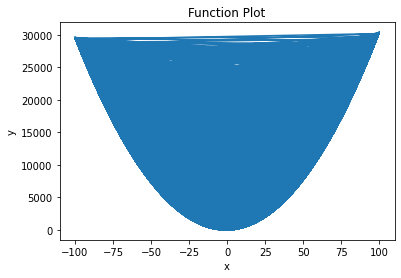

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 166046928.0000 - val_loss: 117220464.0000
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 38784068.0000 - val_loss: 11926478.0000
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 11722007.0000 - val_loss: 11637800.0000
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 11564682.0000 - val_loss: 11521686.0000
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 11420213.0000 - val_loss: 11367980.0000
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 11270786.0000 - val_loss: 11202936.0000
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 11108810.0000 - val_loss: 11059511.0000
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 10962633.0000 - val_loss: 10893793.0000
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 108

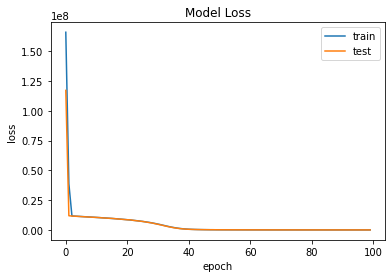

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

x = np.random.uniform(low=-100, high=100, size=10000)
y = 3*x**2 + 4*x - 9

plt.plot(x, y)
plt.title('Function Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

model = Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation=None))

model.compile(loss='mean_squared_error', optimizer='adam')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

test_loss = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


## Problem 2:

### Feedforward Network
- Hidden layer 1
- Input size 784 [28X28] image
- Hidden layer units 500
- Output size 10
- Other Hyperparameters:
 - num_epochs = 5
 - batch_size = 100
 - learning_rate = 0.001

### Try out different regularization and optimization techniques and vary the corresponding hyperparameters
- Hidden layers/units per layer
- L2 regularization
- Dropout
- RMSProp
- Adam
- Minibatches

### Tabulate your findings

In [2]:
import torch 
import torch.nn as nn
import numpy as np


import torchvision
import torchvision.transforms as transforms

In [3]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

### Defining the network

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

### Loading the datasets

<i> 
#### Note: If the following code does not work, do the following:
- open a terminal and enter
- pip install ipywidgets
- jupyter nbextension enable --py widgetsnbextension

#### If the second line shows [OK], it should work </i>

In [5]:
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
test_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=False, 
                                           transform=transforms.ToTensor(),download=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, shuffle=True)

##### Display samples

7


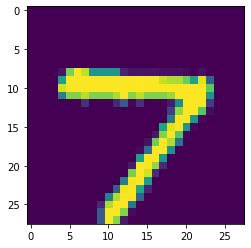

In [7]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    print(labels[0].item())
 
    plt.imshow(images[0].reshape((28,28)))
    break

In [8]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

### Train the model

In [10]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  

        images = images.reshape(-1, 28*28)
        labels = labels
        
        outputs = model(images)
        loss = criterion(outputs, labels)                
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        

Epoch [1/5], Step [100/600], Loss: 0.5386
Epoch [1/5], Step [200/600], Loss: 0.1747
Epoch [1/5], Step [300/600], Loss: 0.3555
Epoch [1/5], Step [400/600], Loss: 0.2589
Epoch [1/5], Step [500/600], Loss: 0.1164
Epoch [1/5], Step [600/600], Loss: 0.0800
Epoch [2/5], Step [100/600], Loss: 0.1551
Epoch [2/5], Step [200/600], Loss: 0.1434
Epoch [2/5], Step [300/600], Loss: 0.1543
Epoch [2/5], Step [400/600], Loss: 0.0692
Epoch [2/5], Step [500/600], Loss: 0.1443
Epoch [2/5], Step [600/600], Loss: 0.0683
Epoch [3/5], Step [100/600], Loss: 0.0472
Epoch [3/5], Step [200/600], Loss: 0.0918
Epoch [3/5], Step [300/600], Loss: 0.0635
Epoch [3/5], Step [400/600], Loss: 0.0353
Epoch [3/5], Step [500/600], Loss: 0.0843
Epoch [3/5], Step [600/600], Loss: 0.0639
Epoch [4/5], Step [100/600], Loss: 0.0374
Epoch [4/5], Step [200/600], Loss: 0.0297
Epoch [4/5], Step [300/600], Loss: 0.0632
Epoch [4/5], Step [400/600], Loss: 0.0097
Epoch [4/5], Step [500/600], Loss: 0.0701
Epoch [4/5], Step [600/600], Loss:

#### Taking 4 samples from the test set 
- display the image
- print the true label
- print the output probability distribution
- print the predicted class

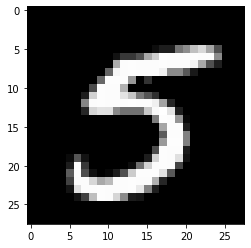

True label: tensor(5)
Predicted class: tensor(5)
Output probability distribution: tensor([1.7773e-11, 2.9550e-09, 1.6028e-11, 2.9452e-06, 2.4156e-14, 1.0000e+00,
        1.2338e-11, 1.3373e-12, 3.1944e-09, 3.0719e-07])


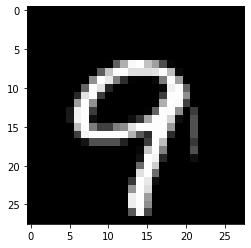

True label: tensor(9)
Predicted class: tensor(9)
Output probability distribution: tensor([1.0192e-06, 3.1842e-08, 1.3883e-05, 2.9431e-04, 2.1715e-05, 1.5448e-07,
        6.0008e-10, 9.8845e-04, 3.8258e-06, 9.9868e-01])


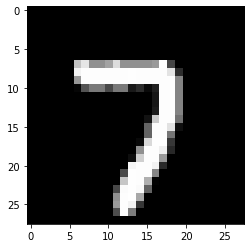

True label: tensor(7)
Predicted class: tensor(7)
Output probability distribution: tensor([4.5389e-09, 2.5288e-08, 1.3668e-06, 3.9605e-06, 4.0826e-14, 9.8851e-10,
        8.0943e-16, 9.9999e-01, 5.6464e-11, 7.4505e-09])


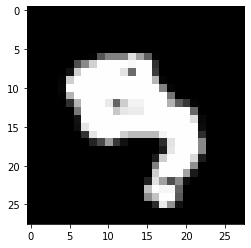

True label: tensor(9)
Predicted class: tensor(9)
Output probability distribution: tensor([1.7851e-08, 9.7024e-09, 5.4930e-07, 2.8577e-01, 8.5124e-05, 1.3821e-03,
        3.3824e-12, 1.9309e-02, 9.7879e-05, 6.9335e-01])


In [14]:
import torch.nn.functional as F

model.eval()

dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images = images.view(images.size(0), -1)

with torch.no_grad():
    outputs = model(images)

_, predicted = torch.max(outputs.data, 1)

for i in range(4):
    image = images[i].view(28, 28)
    label = labels[i]
    predicted_class = predicted[i]
    probs = F.softmax(outputs.data[i], dim=0)
    
    plt.imshow(image, cmap='gray')
    plt.show()
    print("True label:", label)
    print("Predicted class:", predicted_class)
    print("Output probability distribution:", probs)
